In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray as xr
%matplotlib inline

In [2]:
xArr = np.array([0,1,1,0], dtype=float)
yArr = np.array([0,0,1,1], dtype=float)
xyArr = xArr*yArr

ValArr = np.array([0,1,3,1], dtype=float)

Amat = np.stack((np.ones((4),dtype=float),
                    xArr,
                    yArr,
                    xyArr), axis =1)

coeff = np.linalg.inv(Amat)@ValArr

In [3]:
coeff.shape

(4,)

In [4]:
x = 0.5
y = 0.5
multArr = np.array([1, x, y, x*y], dtype=float)
Val = coeff@multArr

In [5]:
Val

1.25

In [6]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

xx,yy = np.meshgrid(x,y)
multArr = np.stack((np.ones((100,100),dtype=float).flatten(),
                    xx.flatten(),
                    yy.flatten(),
                    (xx*yy).flatten()), axis =0)
Val = (coeff@multArr).reshape(100,100)

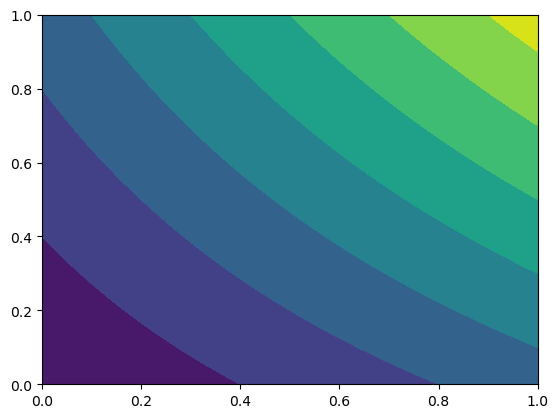

In [7]:
plt.contourf(x,y,Val)

In [8]:
from scipy import interpolate
xt = np.array([0,1], dtype=float)
yt = np.array([0,1], dtype=float)
z = np.array([[0,1],[1,3]])
f = interpolate.interp2d(xt, yt, z, kind='linear')

xnew = xx[0,:]
ynew = yy[:,0]
znew = f(xnew, ynew)

/tmp/ipykernel_967097/1342849370.py:5: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interpolate.interp2d(xt, yt, z, kind='linear')
/tmp/ipykernel_967097/1342849370.py:9: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for reg

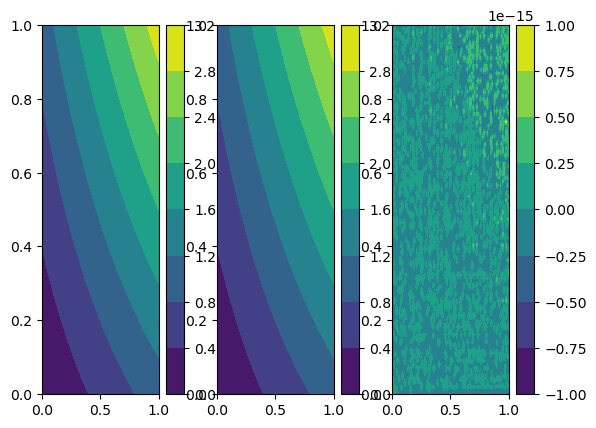

In [9]:
plt.subplot(1,3,1)
plt.contourf(x,y,Val)
plt.colorbar()

plt.subplot(1,3,2)
plt.contourf(x,y,znew)
plt.colorbar()

plt.subplot(1,3,3)
plt.contourf(x,y,Val-znew)
plt.colorbar()

In [10]:
a = 0
b = 1
(a+b)/3,(a+b)/2,(a+b)*2/3,

(0.3333333333333333, 0.5, 0.6666666666666666)

In [15]:
ds = Dataset('prepareData/DATA/GLORYS12v1_dailyAvg_2020-01-01_added.nc')

In [16]:
ds.variables.keys()

dict_keys(['mlotst', 'depth', 'latitude', 'vo', 'thetao', 'uo', 'time', 'bottomT', 'so', 'longitude', 'zos', 'wo', 'rho', 'pres', 'dx_pres', 'dy_pres'])

In [17]:
xds = xr.open_dataset('prepareData/glorysGrid_TEP.nc')
dx = xds['dx'].to_numpy()
dy = xds['dy'].to_numpy()
xds.close()

In [21]:
uo = np.array(ds.variables['uo'])
vo = np.array(ds.variables['vo'])
wo = np.array(ds.variables['wo'])
depth = np.array(ds.variables['depth'])
lat = np.array(ds.variables['latitude'])
lon = np.array(ds.variables['longitude'])
mask = np.logical_or(abs(vo)>100, abs(uo)>100)
vo[mask] = float('nan')
uo[mask] = float('nan')
wo[mask] = float('nan')

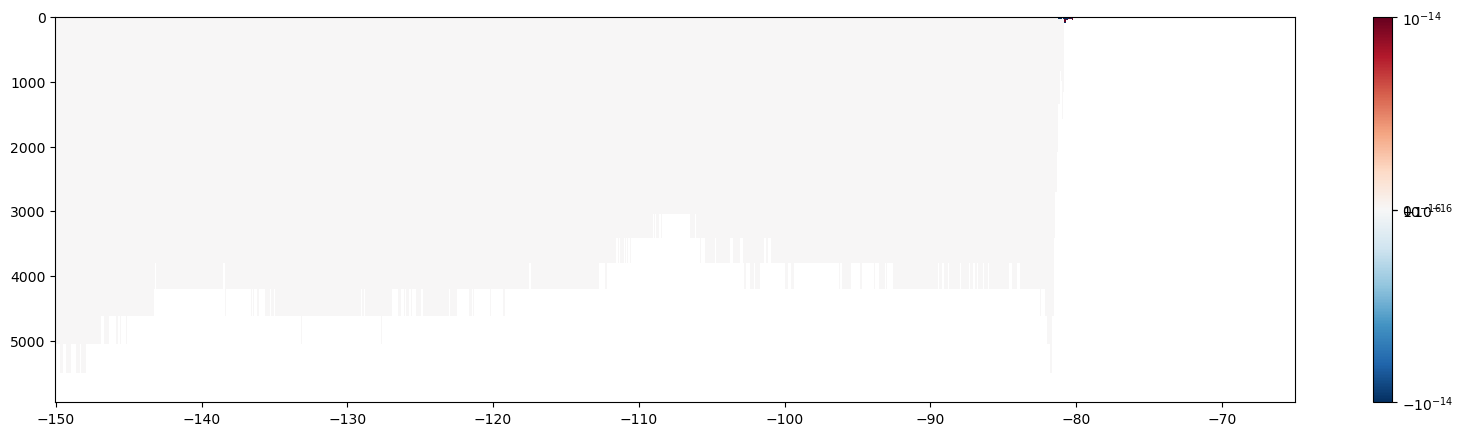

In [28]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

cmap = cm.seismic
plt.figure(figsize=(20,5))
plt.pcolormesh(lon, depth, wo[0,:,100,:], norm=colors.CenteredNorm(), cmap=cmap)
plt.pcolormesh(lon, depth, wo[0,:,100,:], norm=colors.SymLogNorm(linthresh=1e-15, linscale=1e-15,
                                              vmin=-1e-14, vmax=1e-14, base=10),
                       cmap='RdBu_r', shading='auto')
plt.gca().invert_yaxis()
plt.colorbar()

In [ ]:
vo[abs(vo)>100] = 0
plt.pcolormesh(vo[0,:,100,:])
plt.colorbar()
plt.gca().invert_yaxis()

In [ ]:
a =np.arange(10)

x = np.array([0,6,5,4,5,3,4,5,7,8,3,6,9,0])

In [ ]:
a[x]